# Manipulation de fichiers

Un fichier est une suite de `0` et de `1` stockée sur le disque ou obtenu par une connexion réseau. Un fichier a un nom, une taille, une date de création, une date de modification, une date de dernière ouverture, un type (texte, image, vidéo, son, etc.), un emplacement (répertoire) et un format (extension). 

Un fichier peut être ouvert, lu, écrit, fermé, déplacé, renommé, copié, supprimé, etc.

Presque toute opération sur un fichier peut échouer. Pour cette raison, il est important de gérer les erreurs (`try`/`except`). Pour ne pas géner la lisible du code la gestion des erreurs est souvent omise dans les exemples, mais dans un vrai programme, il est important de la faire.

## Manipulation d'un fichier (texte)

Pour pouvoir lire et écrire dans un fichier il faut d'abord l'ouvrir, puis le fermer après utilisation.
Si on oublie de fermer un fichier, on risque de perdre des données.

### Ouverture d'un fichier

Pour ouvrir un fichier, on utilise la fonction `open` qui prend en paramètre le nom du fichier et le mode d'ouverture. Le mode d'ouverture peut être :
- `r` : lecture (read)
- `w` : écriture (write)
- `a` : ajout (append)
- `r` : lecture et écriture
- `b` : binaire (binary)
- `t` : texte (text)
- `x` : exclusive

On peut combiner les modes d'ouverture. Par exemple, pour ouvrir un fichier en mode lecture et binaire, on utilise le mode `rb`.

```python
f = open("fichier.txt", "r")
```

### Écriture dans un fichier

Pour écrire dans un fichier texte, on utilise la méthode `write` qui prend en paramètre une chaîne de caractères.



In [1]:
f = open("bonjour.txt", "a")
f.write("Bonjour tout le monde !!!!!!!\n")
f.close()



### Lecture d'un fichier

Pour lire le contenu d'un fichier texte, on utilise la méthode `read` qui lit tout le contenu du fichier et le retourne sous forme d'une chaîne de caractères.


In [2]:
f = open("bonjour.txt", "r")
contenu = f.read()
print(contenu)
f.close()


Bonjour tout le monde !!!!!!!



## Rajout de contenu dans un fichier

Pour rajouter du contenu dans un fichier, on utilise le mode d'ouverture `a` (append) qui permet d'ajouter du contenu à la fin du fichier.

In [3]:
f = open("bonjour.txt", "a")
f.write("Ciao a tutti !!!\n")
f.close()

## Fermeture automatique d'un fichier

Pour éviter de manquer de fermer un fichier (par exemple en cas d'erreur), il est fortement recommandé d'utiliser la structure `with` qui ferme automatiquement le fichier à la fin du bloc d'instructions.

In [4]:
with open("bonjour.txt", "r") as f:
    contenu = f.read().upper()
    print(contenu)

BONJOUR TOUT LE MONDE !!!!!!!
CIAO A TUTTI !!!



## Lecture d'un fichier à partir d'une URL

Pour lire le contenu d'un fichier à partir d'une URL, on utilise la bibliothèque `requests` qui permet de faire des requêtes HTTP. Le résultat de la requête est stocké dans un objet de type `Response` qui contient le contenu de la réponse, les en-têtes, le code de statut, etc.

- Pour récupérer le code de statut de la réponse, on utilise l'attribut `status_code` de l'objet `Response`.
- Pour récupérer le contenu de la réponse sous forme de chaîne de caractères, on utilise l'attribut `text` de l'objet `Response`.

In [5]:
import requests

url = "https://tzanev.gitlabpages.univ-lille.fr/m1info/cours5/bob.txt"
response = requests.get(url)
if response.status_code == 200:
    print(response.text[:299])
elif response.status_code == 404:
    print("Erreur 404 : le fichier n'existe pas")
else:
    print("Erreur", response.status_code)


Blowin’ in the Wind
(by Bob Dylan)

How many roads must a man walk down
Before you call him a man?
How many seas must a white dove sail
Before she sleeps in the sand?
Yes, and how many times must the cannonballs fly
Before they're forever banned?

The answer, my friend, is blowin' in the 


- Pour lire un contenu binaire (par exemple une image), on utilise l'attribut `content` de l'objet `Response`.


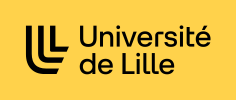

Fichier ulille.png créé.


In [6]:
# La bibliothèque IPython.display permet d'afficher des images dans un notebook
from IPython.display import Image, display

url = "https://ktzanev.github.io/logolabopp/ulille-nom/ulille-nom_100.png"
response = requests.get(url)
if response.status_code == 200:
    # display the image
    display(Image(response.content))
    try:
        with open("ulille.png", "wb") as f:
            f.write(response.content)
        print("Fichier ulille.png créé.")
    except:
        print("Erreur lors de l'écriture du fichier ulille.png.")


## Génération de contenu texte (template)

Pour générer du contenu texte, on peut utiliser des modèles (templates). Nous avons déjà utilisé des f-strings pour des modèles simples. Pour des modèles plus complexes, on peut utiliser la bibliothèque `jinja2` qui permet de générer du contenu texte à partir de modèles.

In [7]:
import jinja2

matheux = [
    {"nom": "Gauss", "prénom": "Carl Friedrich", "naissance": 1777, "décès": 1855},
    {"nom": "Euler", "prénom": "Leonhard", "naissance": 1707, "décès": 1783},
    {"nom": "Hilbert", "prénom": "David", "naissance": 1862, "décès": 1943},
    {"nom": "Poincaré", "prénom": "Henri", "naissance": 1854, "décès": 1912},
    {"nom": "Noether", "prénom": "Emmy", "naissance": 1882, "décès": 1935}
]

template = jinja2.Template(r"""
\documentclass{article}
\begin{document}
\section{Mathématiciens}
\begin{itemize}
{%- for m in mathématiciens %}
    \item {{ m["prénom"] }} {{ m["nom"] | upper }}, \emph{({{ m["naissance"] }}-{{ m["décès"] }})}
{%- endfor %}
\end{itemize}
\end{document}
""")

rasultat = template.render(mathématiciens=matheux)
# display the LaTeX code
print(rasultat)

# write the LaTeX code to a file
with open("mathématiciens.tex", "w") as f:
    f.write(rasultat)

# --- BONUS ---

# compile the LaTeX code to a PDF
import subprocess
try:
    subprocess.run(["pdflatex", "mathématiciens.tex"])
    print("\nPDF créé avec succès.")
except:
    print("\nErreur lors de la création du PDF")


\documentclass{article}
\begin{document}
\section{Mathématiciens}
\begin{itemize}
    \item Carl Friedrich GAUSS, \emph{(1777-1855)}
    \item Leonhard EULER, \emph{(1707-1783)}
    \item David HILBERT, \emph{(1862-1943)}
    \item Henri POINCARÉ, \emph{(1854-1912)}
    \item Emmy NOETHER, \emph{(1882-1935)}
\end{itemize}
\end{document}

PDF créé avec succès.


# Les fichiers CSV

Un fichier CSV (Comma-Separated Values) est un fichier texte qui contient des données tabulaires (tableaux) sous forme de texte. Chaque ligne du fichier correspond à une ligne du tableau et chaque champ est séparé par un caractère de séparation (généralement une virgule, un point-virgule ou une tabulation). 

Si un champ contient un caractère de séparation, un guillemet ou un retour à la ligne, il est encadré par des guillemets. Les guillemets dans un champ sont doublés.

Pour lire et écrire des fichiers CSV, on utilise la bibliothèque `csv` qui fournit des fonctions pour lire et écrire des fichiers CSV.

In [8]:
# Information sur les rues avec des écoles à Lille
import os # pour tester si le fichier existe
from csv import DictReader # pour lire le fichier CSV

# si le fichier 'rues_scolaires.csv' n'existe pas, le télécharger
if not os.path.exists("rues_scolaires.csv"):
    url = "https://opendata.lillemetropole.fr/api/explore/v2.1/catalog/datasets/rues-scolaires/exports/csv"
    response = requests.get(url)
    if response.status_code == 200:
        with open("rues_scolaires.csv", "wb") as f:
            f.write(response.content)
        print("Fichier rues_scolaires.csv créé avec succès.")

# lecture du fichier CSV dans une liste de dictionnaires
with open("rues_scolaires.csv", "r") as f:
    # un générateur de dictionnaires (un par ligne du fichier CSV)
    rues_scolaires = DictReader(f, delimiter=";")

    # modèle de document LaTeX
    template = jinja2.Template(r"""
    \documentclass{article}
    \usepackage[a4paper, margin=2cm]{geometry}
    \usepackage{fontspec}
    \usepackage[shortlabels]{enumitem}
    \title{Rues avec des écoles à Lille}
    \begin{document}
    \maketitle
    \thispagestyle{empty}
    \begin{abstract}
        Certaines rues de Lille sont fermées à la circulation automobile aux heures d'entrée et de sortie des écoles.
    \end{abstract}

    \begin{itemize}[$\triangleright$]
    {% for rue in rues %}
        \item
            \textbf{                 {{- rue["nom_rue"] }}} 
            \emph{({{ rue["etablissements_desservies"] }})}, 
            ferméture {{ rue["close_hours"] }}
    {%- endfor %}
    \end{itemize}
    \end{document}
    """)

    # création du document LaTeX à partir du modèle et des données lues dans le fichier CSV
    resultat = template.render(rues=rues_scolaires)

# affichage du code LaTeX
print(resultat)

# écriture du code LaTeX dans un fichier
with open("rues_scolaires.tex", "w") as f:
    f.write(resultat)

# compilation du code LaTeX en PDF
try:
    subprocess.run(["xelatex", "rues_scolaires.tex"])
    print("\nPDF créé avec succès.")
except:
    print("\nErreur lors de la création du PDF")

Fichier rues_scolaires.csv créé avec succès.

    \documentclass{article}
    \usepackage[a4paper, margin=2cm]{geometry}
    \usepackage{fontspec}
    \usepackage[shortlabels]{enumitem}
    \title{Rues avec des écoles à Lille}
    \begin{document}
    \maketitle
    \thispagestyle{empty}
    \begin{abstract}
        Certaines rues de Lille sont fermées à la circulation automobile aux heures d'entrée et de sortie des écoles.
    \end{abstract}

    \begin{itemize}[$\triangleright$]
    
        \item
            \textbf{Rue Victor Duruy} 
            \emph{(Ecole Philippe de Comines et Ecole Victor Duruy)}, 
            ferméture 8:15-9:00, 16:15-17:00
        \item
            \textbf{Rue du Béguinage} 
            \emph{(Ecole Diderot)}, 
            ferméture 8:15-9:00, 16:15-17:00
        \item
            \textbf{Rue de Colmar et Viala} 
            \emph{(Ecole Camille Desmoulins et Ecole Viala)}, 
            ferméture 8:15-9:00, 16:15-17:00
        \item
            \textbf{Rue 

## Manipulation des fichiers PDF

Il existe plusieurs bibliothèques pour manipuler des fichiers PDF en Python. Nous allons utiliser la bibliothèque `fitz` qui est une bibliothèque de haut niveau pour la bibliothèque `PyMuPDF` qui permet de lire, écrire et modifier des fichiers PDF.

Pour installer la bibliothèque `fitz`, on utilise la commande suivante :

```bash
pip install PyMuPDF
```


In [9]:
# pour installer PyMuPDF (qui arrive avec fitz)
# decommenter la ligne suivante et executer le code

# !pip install PyMuPDF

### Fusion de deux fichiers PDF

In [10]:
import fitz

# Fusionnons les deux documents PDF
with fitz.open("mathématiciens.pdf") as pdf1,\
    fitz.open("rues_scolaires.pdf") as pdf2:
    pdf1.insert_pdf(pdf2)
    pdf1.save("mathématiciens_et_rues_scolaires.pdf")


### Sélection de pages

In [11]:
# récupérons un document pdf à partir d'internet
url = "https://ktzanev.gitlab.io/m1analyse/TDs/m1an_2023-24_td1.pdf"
response = requests.get(url)
if response.status_code == 200:
    print("Fichier téléchargé avec succès.")
    # récupérons le contenu du fichier pdf
    doc = fitz.open("pdf", response.content)
    # gardons seulement la première page, mais 10 fois
    doc.select([0]*10)
    # enregistrons la première page dans un nouveau fichier
    doc.save("m1an_2023-24_td1_page1x10.pdf")
    print("Fichier m1an_2023-24_td1_page1x10.pdf créé avec succès.")

        

Fichier téléchargé avec succès.
Fichier m1an_2023-24_td1_page1x10.pdf créé avec succès.


### Extraction de texte

In [12]:
#extraire le texte d'un document pdf
with fitz.open("mathématiciens.pdf") as pdf:
    text = ""
    for page in pdf:
        text += page.get_text()
    print(text)

# il faut compiler avec xelatex pour que les accents soient bien gérés

1
Math´ematiciens
 Carl Friedrich GAUSS, (1777-1855)
 Leonhard EULER, (1707-1783)
 David HILBERT, (1862-1943)
 Henri POINCAR´E, (1854-1912)
 Emmy NOETHER, (1882-1935)
1



### Extraction d'images

In [13]:
url = "https://raw.githubusercontent.com/py-pdf/sample-files/main/003-pdflatex-image/pdflatex-image.pdf"
response = requests.get(url)
if response.status_code == 200:
    with fitz.open("pdf", response.content) as pdf:
        # Trouver toutes les images de la première page
        images = pdf[0].get_images(full=True)
        for img in images:
            # récupérer la référence de l'image
            xref = img[0]
            # récupérer les données de l'image
            imgdata = pdf.extract_image(xref)
            # récupérer l'extension de l'image (jpg, png, etc.)
            ext = imgdata["ext"]
            # écrire l'image dans un fichier
            with open(f"image_{xref}.{ext}", "wb") as f:
                f.write(imgdata["image"])

## Renommer, déplacer, copier et supprimer des fichiers

Pour renommer, déplacer ou supprimer des fichiers, on utilise les fonctions `rename` et `remove` du module `os` qui fournit des fonctions pour manipuler des fichiers et des répertoires.

Pour créer un répertoire, on utilise la fonction `mkdir` du même module.

In [14]:
# la bibliothèque os permet de manipuler les fichiers et les répertoires
import os

### Renommer un fichier

In [15]:
# renomer le fichier 'mathématiciens.pdf' en 'matheux.pdf'
try:
    os.rename("mathématiciens.tex", "matheux.tex")
    print("Fichier renommé avec succès.")
except:
    print("Erreur lors du renommage du fichier.")

Fichier renommé avec succès.


In [16]:
# remplacer les 'é' par des 'e' dans les noms de tous les fichiers du répertoire courant
for filename in os.listdir("."):
    if "é" in filename:
        newname = filename.replace("é", "e")
        try:
            os.rename(filename, newname)
            print(f"{filename} renommé en {newname}")
        except:
            print(f"Erreur lors du renommage de : {filename}")

mathématiciens.aux renommé en mathematiciens.aux
mathématiciens.log renommé en mathematiciens.log
Erreur lors du renommage de : mathématiciens.pdf
mathématiciens_et_rues_scolaires.pdf renommé en mathematiciens_et_rues_scolaires.pdf


### Supprimer un fichier

In [17]:
# supprimer tous les fichiers auxiliaires de LaTeX (.aux, .log, .out, etc.)
extensions = [".aux", ".log", ".out", ".toc", ".synctex.gz"]
for filename in os.listdir("."):
    for ext in extensions:
        if filename.endswith(ext):
            try:
                os.remove(filename)
                print(f"{filename} supprimé")
            except:
                print(f"Erreur lors de la suppression de : {filename}")

mathematiciens.aux supprimé
mathematiciens.log supprimé
rues_scolaires.aux supprimé
rues_scolaires.log supprimé


### Déplacer un fichier

Popur déplacer un fichier, on utilise la fonction `rename` du module `os` qui prend en paramètre l'ancien nom du fichier et le nouveau nom du fichier (avec le nouveau chemin).

In [18]:
# déplacer tous les fichiers PDF dans un sous-répertoire 'pdf'

# créer le répertoire 'pdf' s'il n'existe pas
if not os.path.exists("pdf"):
    print("Création du répertoire 'pdf'")
    try:
        os.mkdir("pdf")
    except:
        print("Erreur lors de la création du répertoire 'pdf'")
        # arrêter l'execution du script
        raise RuntimeError("Erreur lors de la création du répertoire 'pdf'")
        
# déplacer les fichiers PDF dans le répertoire 'pdf'
for filename in os.listdir("."):
    if filename.endswith(".pdf"):
        newname = os.path.join("pdf", filename)
        try:
            os.rename(filename, newname)
            print(f"{filename} déplacé dans le répertoire 'pdf'")
        except:
            print(f"Erreur lors du déplacement de {filename}")

Création du répertoire 'pdf'
m1an_2023-24_td1_page1x10.pdf déplacé dans le répertoire 'pdf'
mathematiciens_et_rues_scolaires.pdf déplacé dans le répertoire 'pdf'
Erreur lors du déplacement de mathématiciens.pdf
rues_scolaires.pdf déplacé dans le répertoire 'pdf'
